# 1. Load data for practice

In [ ]:
import pandas as pd

df = pd.read_csv('./air_quality_2001_2021.csv')
df.head()

,dt,so2,no2,co,o3,pm10,pm2.5
0,2001-01-31,0.004952,0.039303,0.864058,0.005111,103.361923,65.291538
1,2001-02-28,0.006069,0.048472,0.888093,0.006464,105.924815,66.457037
2,2001-03-31,0.003205,0.038955,0.684410,0.010901,133.864516,70.439355
3,2001-04-30,0.005903,0.034180,0.669548,0.009973,112.954444,49.378519
4,2001-05-31,0.004970,0.034594,0.488658,0.016590,80.453548,45.598710


In [2]:
df.tail()

,dt,so2,no2,co,o3,pm10,pm2.5
244,2021-08-31,0.003276,0.017799,0.359432,0.034899,21.065968,13.476581
245,2021-09-30,0.003080,0.016424,0.314933,0.034246,15.190400,6.110000
246,2021-10-31,0.003468,0.028234,0.391435,0.022902,28.277968,11.227484
247,2021-11-30,0.003863,0.037370,0.553652,0.017362,50.418000,24.369760
248,2021-12-31,0.003159,0.033356,0.541000,0.012912,40.214000,18.268903


# 2. Calculate Pearson correlation coefficient

In [3]:
from scipy.stats import pearsonr

res = pearsonr(df['so2'], df['no2'])
res

PearsonRResult(statistic=0.4181897665316444, pvalue=5.828992100579534e-12)

# 3. Calculate Spearman correlation coefficient

In [4]:
from scipy.stats import spearmanr

res = spearmanr(df['so2'], df['no2'])
res

SignificanceResult(statistic=0.3954341235911387, pvalue=9.528360532104895e-11)

# 4. Normality Test

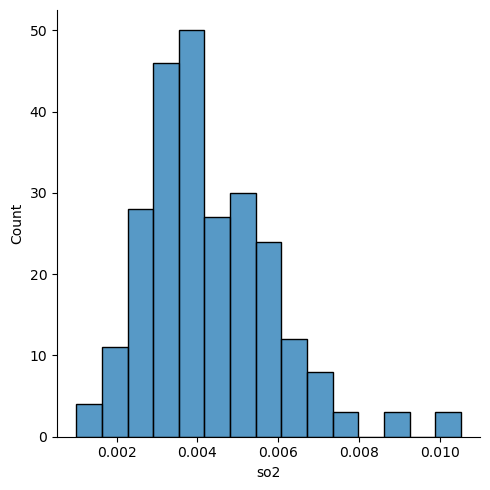

In [5]:
import seaborn as sns

sns.displot(df['so2']) 

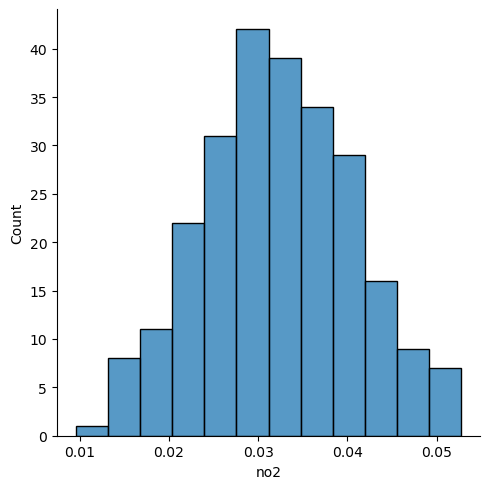

In [6]:
sns.displot(df['no2'])

In [7]:
from scipy.stats import shapiro, normaltest, kstest

res_s_so2 = shapiro(df['so2'])
res_a_so2 = normaltest(df['so2'])
res_k_so2 = kstest(df['so2'], 'norm')

print(res_s_so2)
print(res_a_so2)
print(res_k_so2)

ShapiroResult(statistic=0.9439486861228943, pvalue=3.5986889912464903e-08)
NormaltestResult(statistic=45.81888328850488, pvalue=1.1234555923434547e-10)
KstestResult(statistic=0.500398942213911, pvalue=3.4707494470501455e-58, statistic_location=0.001, statistic_sign=-1)


In [8]:
from scipy.stats import shapiro, normaltest, kstest

res_s_no2 = shapiro(df['no2'])
res_a_no2 = normaltest(df['no2'])
res_k_no2 = kstest(df['no2'], 'norm')

print(res_s_no2)
print(res_a_no2)
print(res_k_no2)

ShapiroResult(statistic=0.9960250854492188, pvalue=0.7791805267333984)
NormaltestResult(statistic=0.757672795910585, pvalue=0.6846576148898526)
KstestResult(statistic=0.5038263528516697, pvalue=4.899221885936048e-59, statistic_location=0.0095913913043478, statistic_sign=-1)


# 5. Correlation Map

In [9]:
corr_mat = df.iloc[:,1:].corr()
corr_mat

,so2,no2,co,o3,pm10,pm2.5
so2,1.000000,0.418190,0.431895,-0.161219,0.334641,0.273395
no2,0.418190,1.000000,0.624517,-0.396422,0.602266,0.555437
co,0.431895,0.624517,1.000000,-0.540948,0.603012,0.579708
o3,-0.161219,-0.396422,-0.540948,1.000000,-0.320287,-0.372818
pm10,0.334641,0.602266,0.603012,-0.320287,1.000000,0.892582
pm2.5,0.273395,0.555437,0.579708,-0.372818,0.892582,1.000000


In [10]:
corr_mat.style.background_gradient(cmap='coolwarm')

,so2,no2,co,o3,pm10,pm2.5
so2,1.000000,0.418190,0.431895,-0.161219,0.334641,0.273395
no2,0.418190,1.000000,0.624517,-0.396422,0.602266,0.555437
co,0.431895,0.624517,1.000000,-0.540948,0.603012,0.579708
o3,-0.161219,-0.396422,-0.540948,1.000000,-0.320287,-0.372818
pm10,0.334641,0.602266,0.603012,-0.320287,1.000000,0.892582
pm2.5,0.273395,0.555437,0.579708,-0.372818,0.892582,1.000000


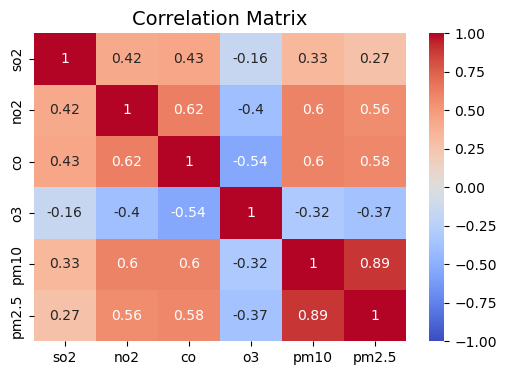

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, cmap="coolwarm",annot=True, vmax=1, vmin=-1)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

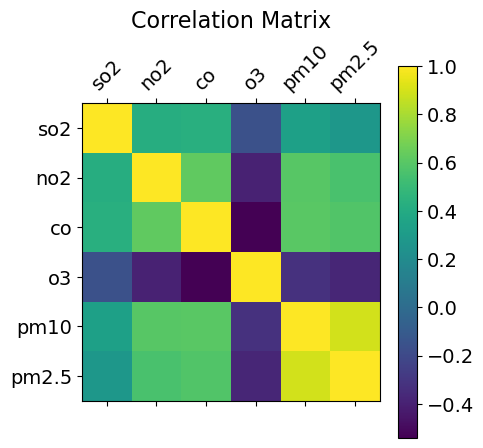

In [12]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 10))
plt.matshow(df.iloc[:,1:].corr())

plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.show()